In [20]:
import tifffile as tif
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyreadr

In [42]:
R_data = '/Users/aichah/Documents/expr_coding_genes.RData'
result = pyreadr.read_r(R_data)

: 

: 

In [ ]:
result.keys()

odict_keys(['full_list'])

In [23]:
df1 = result['full_list']

In [24]:
len(df1)

11727

In [36]:
lnc_list = df1[df1['gene'].str.contains('lncRNA')]
lnc_list.to_csv('/Users/aichah/Documents/test_Rdata_lncRNA_genes.csv',index=False)
CG_list = df1[df1['gene'].str.contains('CG')]
CG_list.to_csv('/Users/aichah/Documents/test_Rdata_CG_genes.csv',index=False)

In [39]:
coding_genes_list = df1[~df1.gene.isin(lnc_list.gene)]
coding_genes_list = coding_genes_list[~coding_genes_list.gene.isin(CG_list.gene)]
coding_genes_list.to_csv('/Users/aichah/Documents/test_Rdata_coding_genes.csv',index=False)

In [40]:
len(df1) == len(coding_genes_list)+len(lnc_list)+len(CG_list)

True

In [41]:
len(coding_genes_list)

6454

In [9]:
lnc_list = df1[df1['gene'].str.contains('lncRNA')]

In [33]:
df1.loc[1:100]

,gene
1,pBPZpGAL4DBDUw
2,pBPp65ADZpUw
3,Myo81F
4,lncRNA:CR46123
5,lncRNA:CR46122
...,...
96,dpr16
97,cno
98,CG1116
99,CG2604


In [16]:
df_all = df1.merge(lnc_list.drop_duplicates(), on=['gene'], 
                   how='left', indicator=True)

In [17]:
df_all.head()

,gene
0,lncRNA:CR46123
1,lncRNA:CR46122
2,lncRNA:CR44922
3,lncRNA:CR45187
4,lncRNA:CR44317


In [15]:
len(df_all[df_all['_merge'].str.contains('left')])

10934

In [18]:
genes_list = df1[~df1.gene.isin(lnc_list.gene)]

In [37]:
len(CG_list)

4480

In [33]:
first = tif.imread('/Users/aichah/Desktop/TLI/data/montage/211114_P36_N1_FlipV_R277_5D.tif')


In [34]:
second = tif.imread('/Users/aichah/Desktop/TLI/data/montage/stable_211114_P36_N1.tif')


In [38]:
first[4:].shape, second.shape

((89, 86, 2, 400, 400), (89, 86, 400, 400))

In [39]:
test = first[4:].copy()
test[:,:,1][second==0]=0

In [40]:
tif.imwrite('/Users/aichah/Desktop/TLI/data/montage/stable_211114_P36_N1_1.tif', 
             test, imagej=True, resolution=(1./0.076, 1./0.076),
                metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10,'axes': 'TZCYX'})

/Users/aichah/.local/lib/python3.9/site-packages/tifffile/tifffile.py:2679: UserWarning: TiffWriter: truncating ImageJ file
  warnings.warn(


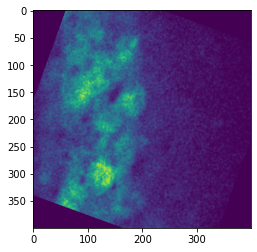

In [8]:
plt.imshow(first[20,20,0])

In [4]:
third = tif.imread('/home/tli_project/Desktop/Data/T4/neurons/SubtypeA/70-91.tif')

In [5]:
arr = np.concatenate((first,second))
del first,second

In [6]:
arr.shape

(91, 86, 1024, 1024)

In [7]:
tif.imwrite('/home/tli_project/Desktop/Data/T4/stage1/220125_analysis/4D_Red_Rigid_220125_P36.5_stitched.tif', 
             arr, imagej=True, resolution=(1./0.076, 1./0.076),
                metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10,'axes': 'TZYX'})

/home/tli_project/.local/lib/python3.8/site-packages/tifffile/tifffile.py:2876: UserWarning: <tifffile.TiffWriter '4D_Red_Rigid_220….5_stitched.tif'> truncating ImageJ file
  warnings.warn(
